### Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, chi2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Checking the data

In [2]:
names = ['buying_price', 'maintenance_cost', 'num_doors', 'capacity', 'lug_boot', 'safety', 'acceptability']
data = pd.read_csv('car.data', names=names)
data.head()

,buying_price,maintenance_cost,num_doors,capacity,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data.shape


(1728, 7)

In [4]:
data['num_doors'].value_counts()

2        432
3        432
4        432
5more    432
Name: num_doors, dtype: int64

In [5]:
data['capacity'].value_counts()

2       576
4       576
more    576
Name: capacity, dtype: int64

### Train-Test Split

In [6]:
data_train, data_test = train_test_split(data, test_size=0.2, stratify=data['acceptability'], random_state=42)

In [7]:
X_train = data_train.iloc[:, :-1]
X_test = data_test.iloc[:, :-1]
y_train = data_train.iloc[:, -1]
y_test = data_test.iloc[:, -1]

In [8]:
(y_train.value_counts() / y_train.size) * 100

unacc    70.043415
acc      22.214182
good      3.979740
vgood     3.762663
Name: acceptability, dtype: float64

In [9]:
(y_test.value_counts() / y_train.size) * 100

unacc    17.510854
acc       5.571635
good      1.013025
vgood     0.940666
Name: acceptability, dtype: float64

### Creating Transformation Pipeline and Using KNN Classifier

In [10]:
ord_enc = OrdinalEncoder()
scaler = StandardScaler()
label_enc = LabelEncoder()

ord_enc.fit(X_train)

X_train = ord_enc.transform(X_train)
X_test = ord_enc.transform(X_test)

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

label_enc.fit(y_train)

y_train = label_enc.transform(y_train)
y_test = label_enc.transform(y_test)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
# print(clf.classes_)

for i in range(0, 4):
    y_pred = clf.predict(X_test[y_test == i])
    print(X_test[y_test == i].shape[0] / y_test.size * 100)
    print(accuracy_score(y_test[y_test == i], y_pred) * 100)
    print("\n\n")
    
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

22.254335260115607
97.40259740259741



4.046242774566474
42.857142857142854



69.94219653179191
99.58677685950413



3.7572254335260116
84.61538461538461



              precision    recall  f1-score   support

           0       0.88      0.97      0.93        77
           1       0.86      0.43      0.57        14
           2       0.99      1.00      0.99       242
           3       1.00      0.85      0.92        13

    accuracy                           0.96       346
   macro avg       0.93      0.81      0.85       346
weighted avg       0.96      0.96      0.96       346



### Using Decision Tree Classifier

In [11]:
names = ['buying_price', 'maintenance_cost', 'num_doors', 'capacity', 'lug_boot', 'safety', 'acceptability']
data = pd.read_csv('car.data', names=names)
data.head()

,buying_price,maintenance_cost,num_doors,capacity,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [12]:
data_train, data_test = train_test_split(data, test_size=0.2, stratify=data['acceptability'], random_state=42)

In [13]:
X_train = data_train.iloc[:, :-1]
X_test = data_test.iloc[:, :-1]

y_train = data_train.iloc[:, -1]
y_test = data_test.iloc[:, -1]

X_train.head()

,buying_price,maintenance_cost,num_doors,capacity,lug_boot,safety
1120,med,med,3,4,med,med
1000,med,high,3,2,small,med
1504,low,high,5more,more,small,med
1202,med,low,2,4,med,high
353,vhigh,low,3,2,small,high


In [14]:
price_cats = ['low', 'med', 'high', 'vhigh']
maint_cats = ['low', 'med', 'high', 'vhigh']
doors_cats = ['2', '3', '4', '5more']
capacity_cats = ['2', '4', 'more']
lug_cats = ['small', 'med', 'big']
safety_cats = ['low', 'med', 'high']
acceptability_cats = ['unacc', 'acc', 'good', 'v-good']

ord_enc = OrdinalEncoder(categories=[price_cats, maint_cats, doors_cats, capacity_cats, lug_cats, safety_cats])
label_enc = LabelEncoder()
scaler = StandardScaler()

ord_enc.fit(X_train)
label_enc.fit(y_train)

X_train = ord_enc.transform(X_train)
X_test = ord_enc.transform(X_test)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = label_enc.transform(y_train)
y_test = label_enc.transform(y_test)

### Comparing KNN and Decision Tree Classifiers

In [15]:
tree = DecisionTreeClassifier(max_leaf_nodes=100, class_weight='balanced')
clf = KNeighborsClassifier(n_neighbors=5)
tree.fit(X_train, y_train)
clf.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        77
           1       0.92      0.86      0.89        14
           2       1.00      1.00      1.00       242
           3       1.00      1.00      1.00        13

    accuracy                           0.99       346
   macro avg       0.97      0.96      0.97       346
weighted avg       0.99      0.99      0.99       346

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        77
           1       0.89      0.57      0.70        14
           2       0.98      0.99      0.99       242
           3       1.00      0.77      0.87        13

    accuracy                           0.96       346
   macro avg       0.94      0.82      0.87       346
weighted avg       0.96      0.96      0.95       346



### Optimizing Decision Tree Classifier

In [16]:
def output_tree_accuracy(max_leaf_nodes, X_train, X_test, y_train, y_test):
    tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, class_weight='balanced')
    
    tree.fit(X_train, y_train)
    
    y_pred_train = tree.predict(X_train)
    y_pred_test = tree.predict(X_test)
    
    return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

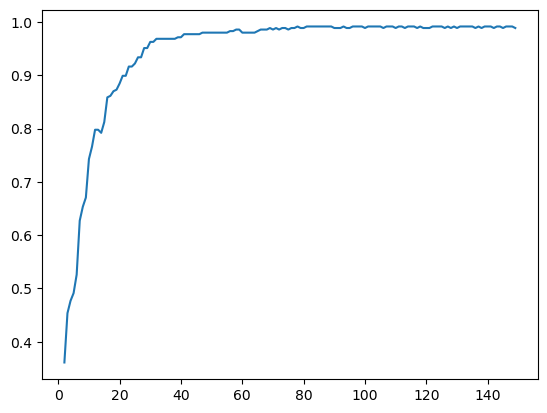

In [17]:
num_nodes = [i for i in range(2, 150)]
y_train_scores = []
y_test_scores = []

for i in num_nodes:
    y_train_score, y_test_score = output_tree_accuracy(i, X_train, X_test, y_train, y_test)
    y_train_scores.append(y_train_score)
    y_test_scores.append(y_test_score)

plt.plot(num_nodes, y_test_scores)